In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_test_copy = x_test.copy()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

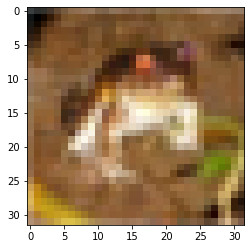

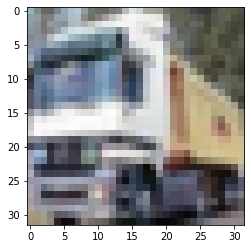

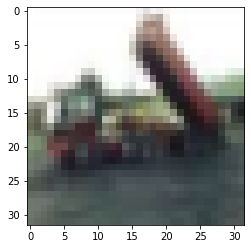

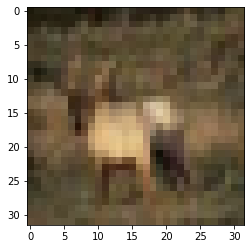

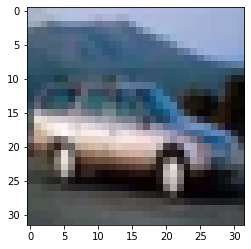

In [5]:
for i in range(5):
    plt.imshow(x_train[i])
    plt.show()

In [6]:
#normalizing
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [7]:
x_train

array([[[[0.07182773, 0.09722503, 0.15002467],
         [0.05555073, 0.08510671, 0.1680591 ],
         [0.06416572, 0.08557414, 0.15041218],
         ...,
         [0.19738931, 0.2065452 , 0.30386149],
         [0.20651145, 0.21914754, 0.33373633],
         [0.20868805, 0.22118572, 0.32022806]],

        [[0.01947871, 0.03136291, 0.04762688],
         [0.        , 0.        , 0.        ],
         [0.02309966, 0.01426236, 0.        ],
         ...,
         [0.15366383, 0.1376968 , 0.15474428],
         [0.16167672, 0.14551397, 0.16359624],
         [0.17202664, 0.15518676, 0.17721359]],

        [[0.03043548, 0.0376355 , 0.05000822],
         [0.02067004, 0.01295102, 0.        ],
         [0.0628824 , 0.04813545, 0.02798366],
         ...,
         [0.14741733, 0.13143786, 0.14067662],
         [0.16303535, 0.14726715, 0.16359624],
         [0.15369593, 0.13021418, 0.13057843]],

        ...,

        [[0.25322319, 0.26658477, 0.22860901],
         [0.25966738, 0.28307232, 0.12697798]

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
#label encoding to OHE
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
#model building
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))

model.add(Dropout(0.25))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [13]:
model.fit(x_train,y_train,verbose=1,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.6878 - accuracy: 0.3856
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3403 - accuracy: 0.5262
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1801 - accuracy: 0.5870
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0566 - accuracy: 0.6282
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9651 - accuracy: 0.6609
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8927 - accuracy: 0.6870
Epoch 7/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8230 - accuracy: 0.7122
Epoch 8/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7637 - accuracy: 0.7306
Epoch 9/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7084 - accuracy: 0.7484
Epoch 10/10
1563/1563 [==============================] - 24s 16m

In [14]:
model.metrics_names

['loss', 'accuracy']

In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss,"\n",val_acc)

313/313 [==============================] - 2s 4ms/step - loss: 1.1065 - accuracy: 0.6488
1.1064679622650146 
 0.6488000154495239


In [16]:
from sklearn.metrics import classification_report

In [17]:
predictions = model.predict([x_test])

In [18]:
pred_class=np.argmax(predictions,axis=1)

5


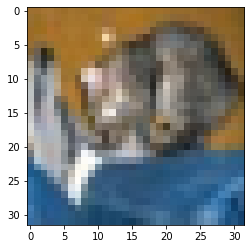

8


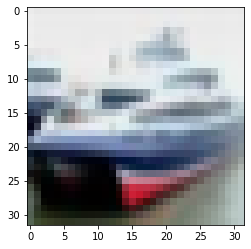

1


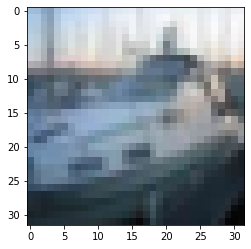

0


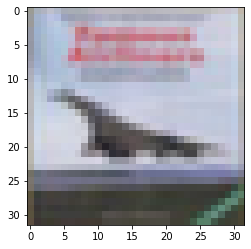

4


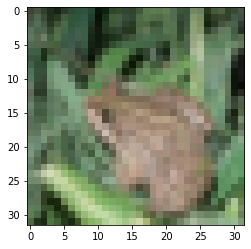

6


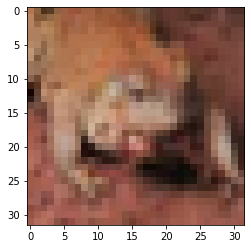

5


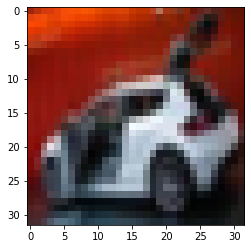

6


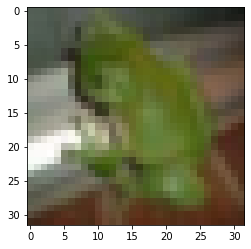

3


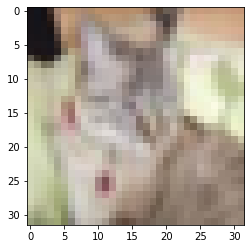

1


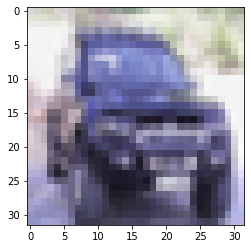

0


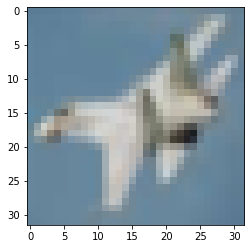

9


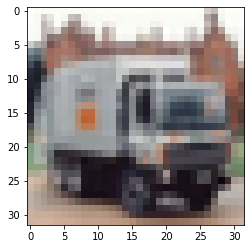

5


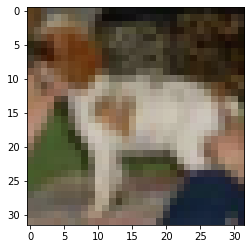

7


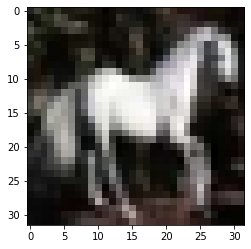

9


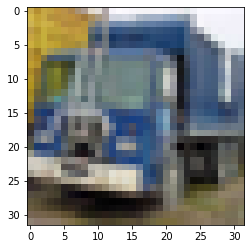

8


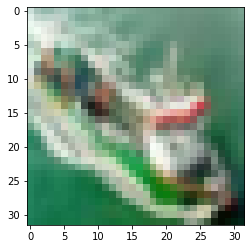

5


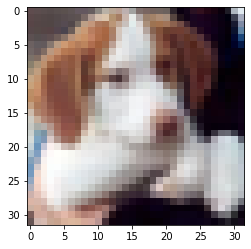

5


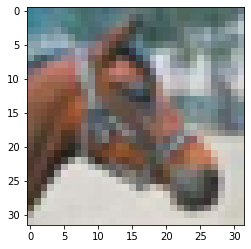

8


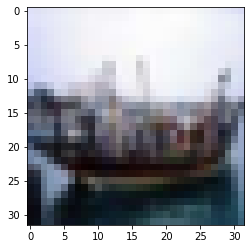

6


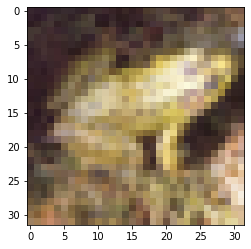

In [19]:
for i in range(20):
    plt.imshow(x_test_copy[i])
    print(pred_class[i])
    plt.show()

In [20]:
from sklearn.metrics import classification_report

In [21]:
y_test_class=np.argmax(y_test,axis=1)

In [22]:
print("Classification Report: \n", classification_report(y_test_class, pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.65      0.68      1000
           1       0.79      0.76      0.77      1000
           2       0.57      0.52      0.55      1000
           3       0.43      0.52      0.47      1000
           4       0.65      0.52      0.58      1000
           5       0.56      0.56      0.56      1000
           6       0.64      0.80      0.71      1000
           7       0.65      0.77      0.71      1000
           8       0.86      0.66      0.74      1000
           9       0.74      0.74      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

